# Advertising Sales Channel Prediction

# Introduction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . <br><br>The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. In this problem, we are using Machine Learning Algorithms to  predicts sales based on the money spent on different platforms for marketing.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv("adverstising_sales_dataset")

### Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


This shows the first five rows of the dataset.

In [4]:
# dropping "Unnamed" Column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

###### Exploratory Data Analysis after dropping "Unnamed" Column

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

There are 200 rows and 4 columns after dropping "Unnamed" column in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We can see that there are no null values in the dataset.

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The above shown is statistical description of the data.

### Outlier Analysis

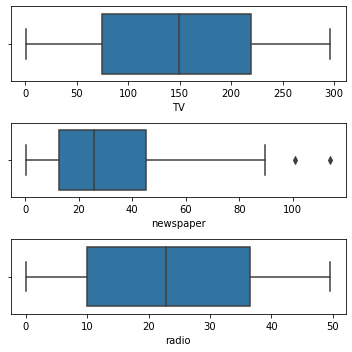

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

### Univariate Analysis

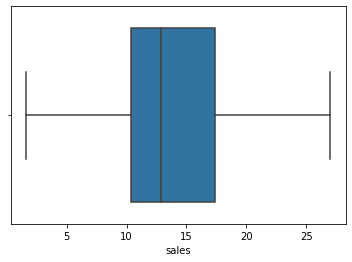

In [11]:
sns.boxplot(df['sales'])
plt.show()

<br><br>Checking each variable is related with other variables using scatter plot.

<Figure size 1728x720 with 0 Axes>

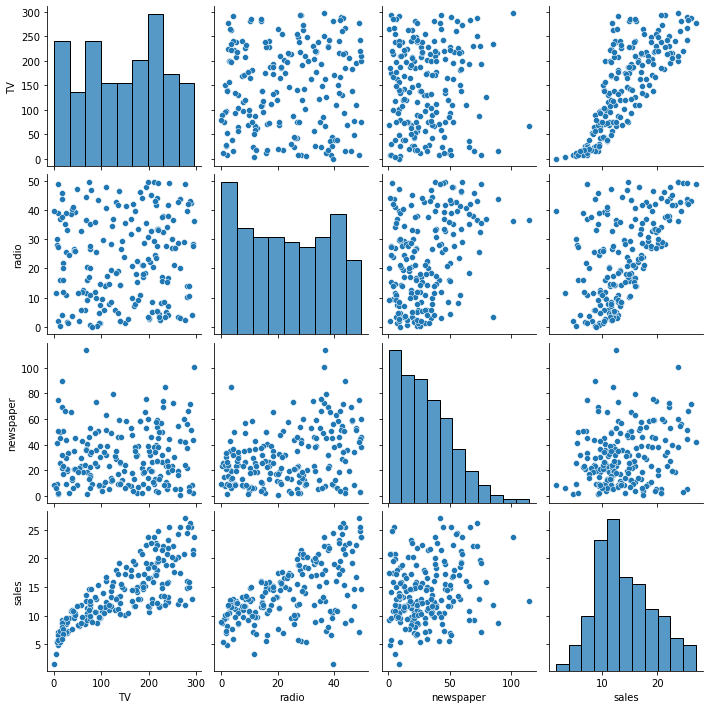

In [12]:
figure = plt.figure(figsize=(24,10))
sns.pairplot(df)
plt.show()

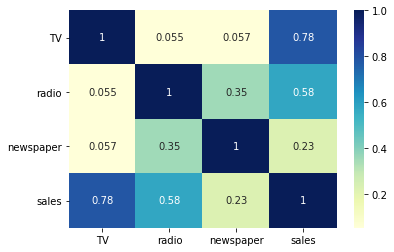

In [13]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

The above heatmap shows the correlation between different variables.

<br> Observation:<br>From the pairplot and the heatmap, we can see that the variable 'TV' seems to be most correlated with 'sales'. 

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

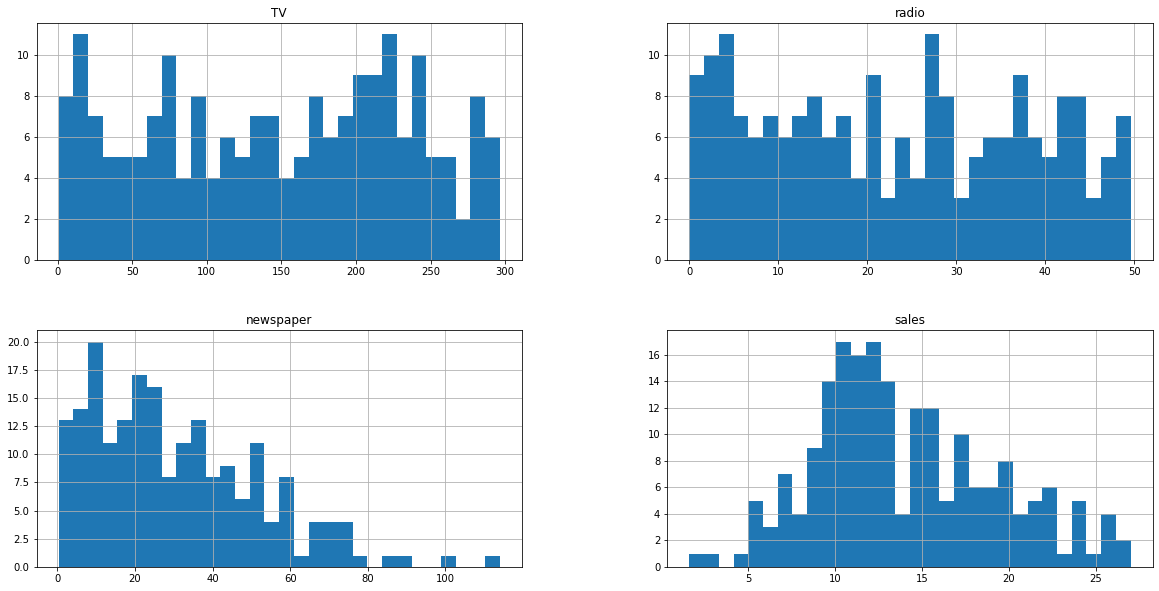

In [14]:
df.hist(figsize=(20,10), grid=True, layout=(2, 2), bins = 30)

Histogram visualisation for each attribute showing what kind of distribution it is.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

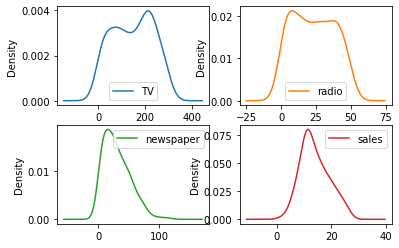

In [15]:
df.plot(kind='density',layout=(2,2),sharex=False,sharey=False,subplots=True,grid=False)

<AxesSubplot:xlabel='TV', ylabel='Density'>

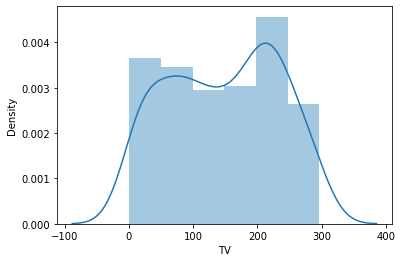

In [16]:
import seaborn as sns
sns.distplot(df['TV'])

<AxesSubplot:xlabel='TV', ylabel='count'>

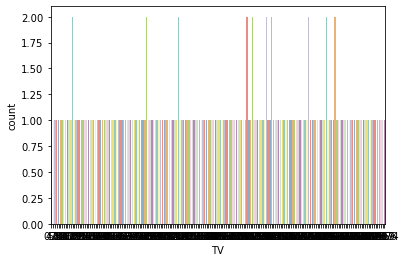

In [17]:
sns.countplot(x = 'TV', data = df, palette="Set3")

### Preprocessing, Modeling, Evaluation

In [18]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

There is no need to apply cleaning to our dataset. Because we dont have any error or empty or null values.

In [19]:
X = df.drop('TV', axis=1)
y = df['TV'].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###### Model Training

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Test Accuracy of LinearRegression: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy of LinearRegression: 84.45%


In [24]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
print("Test Accuracy of LinearSVR: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy of LinearSVR: 5.81%


In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print("Test Accuracy of DecisionTreeRegressor: {}%".format(round(dtr.score(x_test,y_test)*100,2)))

Test Accuracy of DecisionTreeRegressor: 86.91%


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print("Test Accuracy of RandomForestRegressor: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy of RandomForestRegressor: 93.02%


### Checking Cross Validation Score

In [32]:
scr=cross_val_score(svm,X,y,cv=5)
print("Cross Validation Score of SVM Model:", scr.mean())

Cross Validation Score of SVM Model: -0.017144198633847908


In [30]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of Linear Regression Model:", scr.mean())

Cross Validation Score of Linear Regression Model: 0.8304269883414082


In [33]:
scr=cross_val_score(dtr,X,y,cv=5)
print("Cross Validation Score of Decision Tree Regressor Model:", scr.mean())

Cross Validation Score of Decision Tree Regressor Model: 0.8945695698277168


In [34]:
scr=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of Random Forest Regressor Model:", scr.mean())

Cross Validation Score of Random Forest Regressor Model: 0.942969998310829


Best Model should have minimum difference between Accuracy and Cross Validation Score. So the best model here is Random Forest Regressor Model.

#### Hyper Parameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [41]:
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

25.920497658974234

#### Predictions

In [42]:
OutputDF=pd.DataFrame({'Actual Money Spent':y_test,'Predicted  Money Spent':y_pred})
OutputDF.head()

,Actual Money Spent,Predicted Money Spent
0,163.3,173.966667
1,195.4,200.290000
2,292.9,240.433333
3,11.7,19.730000
4,220.3,243.813333


### Saving the model

In [44]:
import joblib
joblib.dump(rf, "Advertising_Sales_Channel.pkl")

['Advertising_Sales_Channel.pkl']

In [45]:
# Load the model from the file
rf_from_joblib = joblib.load('Advertising_Sales_Channel.pkl') 

In [46]:
# Use the loaded model to make predictions
rf_from_joblib.predict(x_test)

array([175.303, 213.905, 245.286,  19.548, 243.789,  85.693, 212.107,
        35.89 , 182.375, 186.325,  32.528,  63.087, 234.589,  11.5  ,
       132.715, 173.798,  13.5  , 209.184,  98.154, 228.443, 225.719,
        83.536,  45.988, 238.7  ,  64.28 ,  42.113, 217.636, 158.135,
        76.527,  11.938, 129.472,  99.151, 231.692,  20.052, 236.712,
       240.572,  74.142, 246.291, 143.776,  23.853, 118.636, 242.301,
        47.414,  67.093, 185.426,  33.821,  71.12 , 149.37 , 125.614,
       105.583])